# <font color=darkcyan>  Introduction to Bayes classification with discriminant analysis</font>

In [68]:
import numpy as np
import scipy.stats as ss
import matplotlib.pyplot as plt
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.model_selection import train_test_split
from sklearn.inspection import DecisionBoundaryDisplay
import sklearn.metrics as metrics

### <font color=darkred> Linear discriminant analysis </font>

In [14]:
# set parameters
n = 100
mu1 = np.array([-3, 0])
mu2 = np.array([3, 5])
mu3 = np.array([4, -4])
mu = [mu1, mu2, mu3]
sigma = [1, 1, 1]
rho = [0.5, 0.5, 0.5]
cov = [np.array([[1,r],[r,1]])*s for r,s in zip(rho,sigma)]

print(cov)

[array([[1. , 0.5],
       [0.5, 1. ]]), array([[1. , 0.5],
       [0.5, 1. ]]), array([[1. , 0.5],
       [0.5, 1. ]])]


<font color=darkred>
    
- For each pair of mean and covariance, sample n Gaussian random variables with the associated mean and covariance.

- Associate each random variable with a label depending on the mean and covariance.
    
</font>

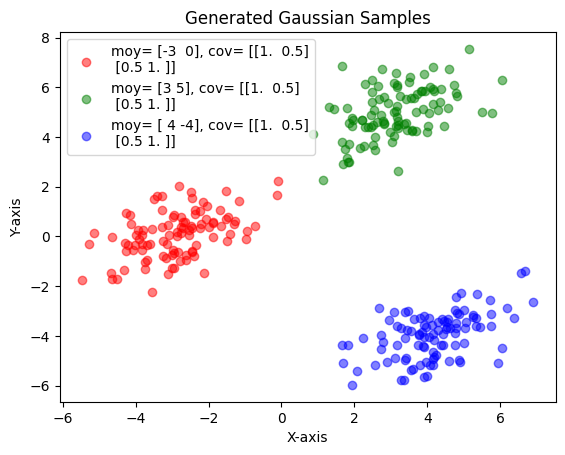

In [15]:
samples = [np.random.multivariate_normal(m, c, n) for m, c in zip(mu, cov)]

colors = ['r', 'g', 'b']
for sample, color, mean ,cov in zip(samples, colors, mu, cov):
    plt.scatter(sample[:, 0], sample[:, 1], alpha=0.5, label=f"moy= {mean}, cov= {cov}", color=color)

plt.legend()
plt.xlabel("X-axis")
plt.ylabel("Y-axis")
plt.title("Generated Gaussian Samples")
plt.show()

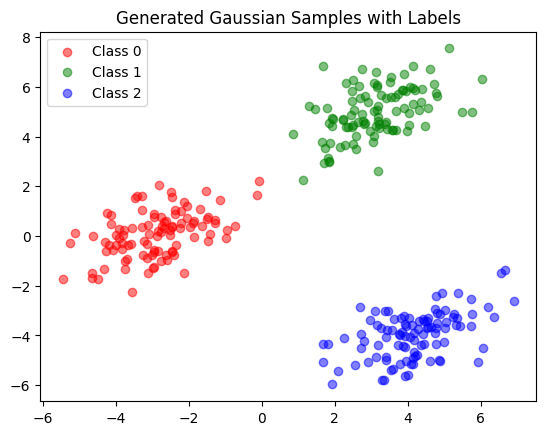

In [24]:
labels = [0]*n + [1]*n + [2]*n
labels = np.array(labels)

# Plot samples with labels
colors = ['r', 'g', 'b']
for i in range(len(mu)):
    plt.scatter(samples[labels == i, 0], samples[labels == i, 1], alpha=0.5, label=f"Class {i}", color=colors[i])

plt.legend()
plt.title("Generated Gaussian Samples with Labels")
plt.show()

<font color=darkred>
    
- Run a linear discriminant analysis using ``LinearDiscriminantAnalysis`` from ``sklearn.discriminant_analysis``  
    
</font>

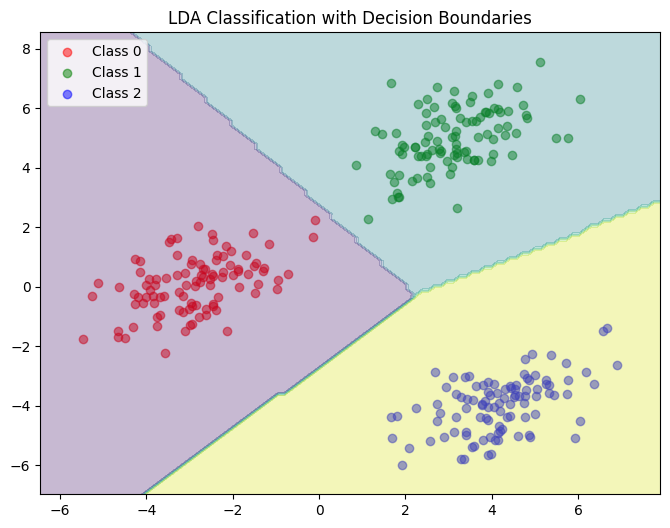

In [45]:
X = np.vstack(samples)
y = np.array(labels)

# Apply Linear Discriminant Analysis
lda = LinearDiscriminantAnalysis(store_covariance=True)
lda.fit(X, y)


plt.figure(figsize=(8, 6))
colors = ['r', 'g', 'b']
for i in range(len(mu)):
    plt.scatter(X[y == i, 0], X[y == i, 1], alpha=0.5, label=f"Class {i}", color=colors[i])

x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))


plt.contourf(xx, yy, Z, alpha=0.3)
plt.legend()
plt.title("LDA Classification with Decision Boundaries")
plt.show()

<font color=darkred>
    
- Compare the LDA estimated parameters with MLE computations.
    
</font>

In [46]:
# MLE estimations
mle_priors = [1/3]*3
mle_means = np.array([X[y == i].mean(axis=0) for i in [0,1,2]])


print("LDA moyenne estim:\n", lda.means_)
print("\nMLE moyenne:\n", mle_means)
print(f"\n\nproba lda = {lda.priors_} VS proba mle = {mle_priors}")

print(lda.covariance_)




LDA moyenne estim:
 [[-2.89425449  0.0871673 ]
 [ 3.11837889  4.98288224]
 [ 4.16721387 -3.96618332]]

MLE moyenne:
 [[-2.89425449  0.0871673 ]
 [ 3.11837889  4.98288224]
 [ 4.16721387 -3.96618332]]


proba lda = [0.33333333 0.33333333 0.33333333] VS proba mle = [0.3333333333333333, 0.3333333333333333, 0.3333333333333333]
[[1.12889083 0.49020408]
 [0.49020408 0.91709063]]


<font color=darkred>
    
- Compare the LDA prediction using ``predict`` with the decision_function chosen label.
    
</font>

In [60]:
print(np.argmax(decision, axis=1))

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2]


In [66]:
decision = lda.decision_function(X)
y_pred_decision = np.argmax(decision, axis=1)

y_pred_lda = lda.predict(X)

# Compare predictions
differences = [y_pred_decision[i] - y_pred_lda[i] for i in range(n)]
print(differences)


[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


<font color=darkred>
    
- Display the decision boundary with ``DecisionBoundaryDisplay``.
    
</font>

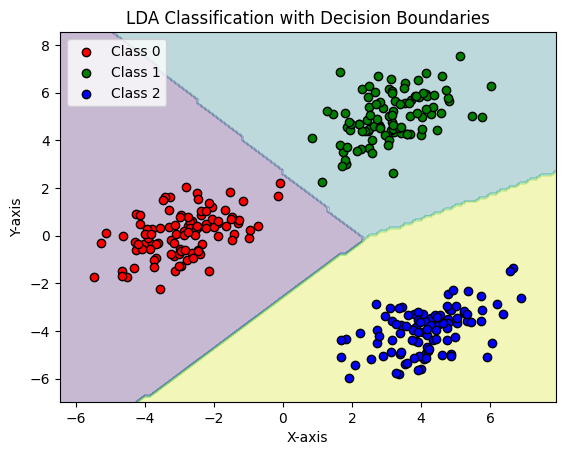

In [70]:
disp = DecisionBoundaryDisplay.from_estimator(
    lda, X_train, response_method="predict", alpha=0.3
)

# Plot the original data points
colors = ['r', 'g', 'b']
for i in range(len(mu)):
    plt.scatter(X[y == i, 0], X[y == i, 1], label=f"Class {i}", color=colors[i], edgecolor='k')

plt.legend()
plt.xlabel("X-axis")
plt.ylabel("Y-axis")
plt.title("LDA Classification with Decision Boundaries")
plt.show()


### <font color=darkred> Quadratic discriminant analysis </font>

In [71]:
# set parameters
n = 100
mu = [np.array([-2, 0]),
      np.array([2.8, 3.5]),
      np.array([4, -5.4])]
sigma = [1, 0.2, 1.3]
rho = [-.5, 0.5, 0.2]
cov = [np.array([[1,r],[r,1]])*s for r,s in zip(rho,sigma)]

<font color=darkred>
    
- For each pair of mean and covariance, sample n Gaussian random variables with the associated mean and covariance.

- Associate each random variable with a label depending on the mean and covariance.
    
</font>

<font color=darkred>
    
- Run a quadratic discriminant analysis using ``QuadraticDiscriminantAnalysis`` from ``sklearn.discriminant_analysis``  
    
</font>

<font color=darkred>
    
- Compare the QDA estimated parameters with MLE computations.
    
</font>

<font color=darkred>
    
- Display the decision boundary with ``DecisionBoundaryDisplay``.
    
</font>

### <font color=darkred> Discriminant analysis with real data </font>

This data sets consists of 3 different types of irises’ (Setosa, Versicolour, and Virginica) petal and sepal length, stored in a 150x4 numpy.ndarray

The rows being the samples and the columns being: Sepal Length, Sepal Width, Petal Length and Petal Width.

The dataset can be found here https://scikit-learn.org/1.5/auto_examples/datasets/plot_iris_dataset.html

In [ ]:
from sklearn.datasets import load_iris

# Load Iris dataset
iris = load_iris()
X_iris = iris.data
y_iris = iris.target

# Select two classes for visualization
X_iris = X_iris[:100, [0, 2]]
y_iris = y_iris[:100]

<font color=darkred>
    
- Compare the empirical means and covariances in each group.
    
</font>

<font color=darkred>
    
- Display the decision boundary of a QDA on this dataset.
    
</font>